# MEDICAL IMAGING MODALITIES - PRACTICAL 1

<span style="color:indigo">Marcos Frías, 218211 and Raquel González, 217787</span>

### MyPhantomFile functions

In [8]:
# import numpy as np
from numpy import zeros
from numpy import mgrid
from numpy import pi
from numpy import sin
from numpy import cos

## Creating our phantom image.
def MyPhantom(n, p_type):
    #Select the phantom type introduced as input        
    ellipses = _select_phantom(p_type) # calling the _select_phanthom function with p_type 
    # desired as input, would return a list of six values
    
    # Blank image
    p = zeros((n,n)) # creates a matrix nxn of all zeros, it represents the number of pixels of the image
    # the higher the number, the higher the resolution
    
    #  Create the pixel grid
    ygrid, xgrid = mgrid[-1:1:(1j*n), -1:1:(1j*n)] 
    # mgrid returns a multidimensional meshgrid using indexation, in this case it creates a 2D meshgrid which will be returned in ygrid and xgrid 
    # it goes from -1 to 1 (both included as there are complex numbers in the matrix length) with n steps
    # the fact that it goes from -1 to 1 is an assumption we make for the image to be represented in a constant space, meaning it would change the number of pixels of it but not its size

    for e in ellipses: # a loop to define the variables
        # the values that define the phanthom are in the diferent positions of the list 'ellipses'
        I   = e[0]         # Intensity value of ellipse
        # the intensity represent how dark or light each pixel of the phanthom will be, the higher the lighter
        a   = e[1]         # Length of the major axis
        b   = e[2]         # Length of the minor axis
        # a and b determine the dimensions of the ellipse
        x0  = e[3]         # Center of ellipse, x coordinate
        y0  = e[4]         # Center of ellipse, y coordinate
        # x0 and y0 represent where it will be placed the center of the ellipse, if it is zero it will be in the center, if not it will have an offset (displaced from the center)
        phi = e[5]*pi/180  # Rotation angle in radians
        # phi represent the angle of rotation of the ellipse

        # Create the offset x and y values for the grid
        x = xgrid - x0 
        y = ygrid - y0
        # the x and y will be the positions where the center of the ellipse will be placed, they are calculated by subtracting each offset to its corresponding grid array

        cos_p = cos(phi) 
        sin_p = sin(phi)
        # this calculates the cosinus and sinus required for rotating the ellipses

        # Find the pixels within the ellipse
        locs = (((x * cos_p + y * sin_p)**2) / (a**2) 
                + ((y * cos_p - x * sin_p)**2) / (b**2)) <= 1
        # if we search for the ellipse formula, we can observe this sum must be one in order to determine the limits of the ellipse
        # so all the points of the grid result on a sum less than one, will correspond to the ellipse inner part, we would save all the points in the variable locs

        # Add the ellipse intensity to those pixels
        p[locs] += I 
        # add the intensity value of the list to the positions of the pixels selected before, in order to visualize it 

    return p  

def _select_phantom(name):
    if (name.lower () == 'point at center'): #using lower function to convert to lowercase the input and check if it is equal to 'point at center'
        e = _point_at_center() # calling the _point_at_center function
    elif (name.lower () == 'two points'): # create a new condition for the two points desired
        e = _two_points() # calling the _two_point function
    elif (name.lower () == 'shepp logan'):
        e = _shepp_logan() # calling the _shepp_logan function
    else:
        raise ValueError ("Unknown phantom type: %s" % name)
                
    return e


def _point_at_center():
    # this function returns a list with different values, which would be needed to define the ellipse
    return [[ .50, .0230, .0230,  0,  0,   0]] 

def _two_points():
    # this new function will return two sublist that will carry the information for the two different ellipses
    return [[ .50, .0230, .0230,  0,  0,   0], [ .50, .0230, .0230,  0.1,  0.8,   0]] 

def _shepp_logan():
    # this new function will return ten sublist that will carry the information for the different ellipses
    return [[ 1.00, 0.6900, 0.9200, 0.00, 0.0000, 0.00 ],
            [-0.80, 0.6624, 0.8740, 0.00,-0.0184, 0.00 ],
            [-0.20, 0.1100, 0.3100, 0.22, 0.0000,-18.0 ],
            [-0.20, 0.1600, 0.4100,-0.22, 0.0000, 18.0 ],
            [ 0.10, 0.2100, 0.2500, 0.00, 0.3500, 0.00 ],
            [ 0.10, 0.0460, 0.0460, 0.00, 0.1000, 0.00 ],
            [ 0.10, 0.0460, 0.0460, 0.00,-0.1000, 0.00 ],
            [ 0.10, 0.0460, 0.0230,-0.08,-0.6050, 0.00 ],
            [ 0.10, 0.0230, 0.0230, 0.00,-0.6060, 0.00 ],
            [ 0.10, 0.0230, 0.0460, 0.06,-0.6050, 0.00 ]]

## TASKS

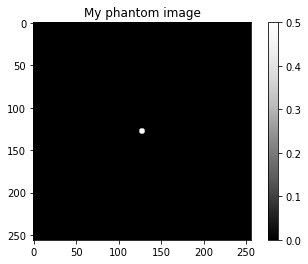

In [9]:
import numpy
import matplotlib.pyplot
import matplotlib.cm
import MyPhantomFile

phantom = MyPhantom(256, 'point at center')
fig = matplotlib.pyplot.figure()
matplotlib.pyplot.title('My phantom image')
matplotlib.pyplot.imshow(phantom, cmap=matplotlib.cm.Greys_r)
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()

<span style="color:indigo">As we can observe in the image above, the phanthom contains a white circle in the middle of a 256x256 pixels image.  </span>

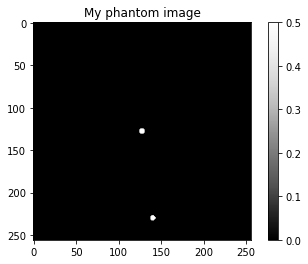

In [5]:

phantom = MyPhantom(256, 'two points')
fig = matplotlib.pyplot.figure()
matplotlib.pyplot.title('My phantom image')
matplotlib.pyplot.imshow(phantom, cmap=matplotlib.cm.Greys_r)
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()


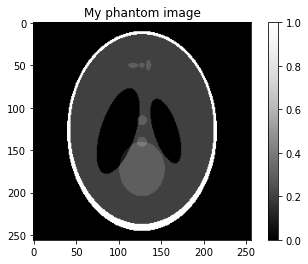

In [6]:
phantom = MyPhantom(256, 'shepp logan')
fig = matplotlib.pyplot.figure()
matplotlib.pyplot.title('My phantom image')
matplotlib.pyplot.imshow(phantom, cmap=matplotlib.cm.Greys_r)
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()

In [7]:
# hacer el 8

In [12]:
# import numpy as np
from numpy import zeros
from numpy import mgrid
from numpy import pi
from numpy import sin
from numpy import cos

## Creating our phantom image.
def MyRectangularPhantom(n, p_type):
    #Select the phantom type introduced as input        
    ellipses = _select_phantom(p_type) # calling the _select_phanthom function with p_type 
    # desired as input, would return a list of six values
    
    # Blank image
    p = zeros((n,n)) # creates a matrix nxn of all zeros
    
    #  Create the pixel grid
    ygrid, xgrid = mgrid[-1:1:(1j*n), -1:1:(1j*n)] 
    # mgrid returns a multidimensional meshgrid using indexation
    # in this case it creates a two dimensional meshgrid that goes from -1 to 1 (both included as there are complex numbers in the matrix length) with n steps, so it would cover the whole image dimensions
    #if p_type.lower() == 'point at center':
    for e in ellipses: # a loop to define the variables
        # the values that define the phanthom are in the diferent position of the list 'ellipses'
        I   = e[0]         # Intensity value of ellipse
        a   = e[1]         # Length of the major axis
        b   = e[2]         # Length of the minor axis
        x0  = e[3]         # Center of ellipse, x coordinate
        y0  = e[4]         # Center of ellipse, y coordinate
        phi = e[5]*pi/180  # Rotation angle in radians

        # Create the offset x and y values for the grid
        x = xgrid - x0 # explain
        y = ygrid - y0

        cos_p = cos(phi) # explain
        sin_p = sin(phi)

        # Find the pixels within the ellipse
        locs = (abs(x*cos_p + y*sin_p) <= a) & (abs(y*cos_p + x*sin_p) <= b)

        # Add the ellipse intensity to those pixels
        p[locs] += I

    return p  

def _select_phantom(name):
    if (name.lower () == 'point at center'): #using lower function to convert to lowercase the input and check if it is equal to 'point at center'
        e = _point_at_center() # calling the _point_at_center function
    elif (name.lower () == 'two points'):
        e = _two_points()
    elif (name.lower () == 'shepp logan'):
        e = _shepp_logan()
    else:
        raise ValueError ("Unknown phantom type: %s" % name)
                
    return e


def _point_at_center():
    # this function returns a list with different values, which would be needed to define the ellipse
    return [[ .50, .0230, .0230,  0,  0,   0]] 

def _two_points():
    return [[ .50, .0230, .0230,  0,  0,   0], [ .50, .0230, .0230,  0.1,  0.8,   0]]


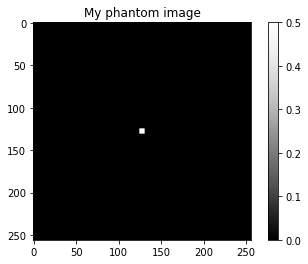

In [13]:
phantom = MyRectangularPhantom(256, 'point at center')
fig = matplotlib.pyplot.figure()
matplotlib.pyplot.title('My phantom image')
matplotlib.pyplot.imshow(phantom, cmap=matplotlib.cm.Greys_r)
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()

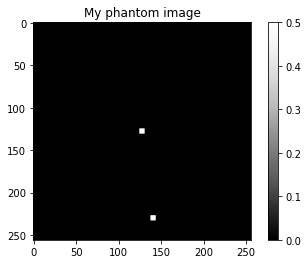

In [14]:
phantom = MyRectangularPhantom(256, 'two points')
fig = matplotlib.pyplot.figure()
matplotlib.pyplot.title('My phantom image')
matplotlib.pyplot.imshow(phantom, cmap=matplotlib.cm.Greys_r)
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()

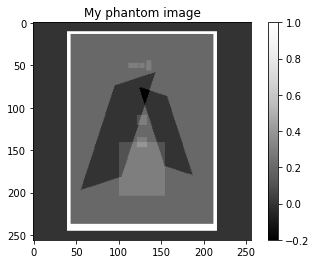

In [15]:
phantom = MyRectangularPhantom(256, 'shepp logan')
fig = matplotlib.pyplot.figure()
matplotlib.pyplot.title('My phantom image')
matplotlib.pyplot.imshow(phantom, cmap=matplotlib.cm.Greys_r)
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()

# Ex.3 : Plotter Beam

In [29]:
from numpy import arange
from numpy import asarray
from numpy import ndarray
from numpy import ndim
from numpy import shape
from numpy import ceil
from numpy import hypot
from numpy import mgrid
from numpy import pi
from numpy import zeros
from numpy import sin
from numpy import cos
from numpy import bincount
from numpy import max


def MyParallelBeamProjections(image, theta = arange(180)):      
# arange: return spaced values within a given interval.
# For instance, theta = arange(180) = array([0,...,179])
#
# asarray: convert the input to an array.
# For instance:
# >> x = [0,1,2]
# >> a = asarray(x)
# >> array([0,1,2]) 
        
    theta = asarray(theta)
    
    if(not(isinstance(image, ndarray)) or (image.ndim != 2)):
        raise TypeError("Input parameter image must be an MxN array")
        # condition to check that the type of inputs correspond to an image and an array and that the image is bidimensional
        # if not, it raises an error
    
    if(ndim(theta) != 1):
        raise TypeError("Second input parameter must be a 1D vector")
        # another condition to check that theta is unidimensional
        # if not, it raises an error
    
    n, m = shape(image) # returns the size of the image in a tuple to then save each position in n and m respectively
    
    # Center of image
    xc = (m + 1) / 2
    yc = (n + 1) / 2
    
    # Divide each pixel into 2x2 subpixels
    img_hires = (image.repeat(2, axis = 0)).repeat(2, axis = 1)
    # the repeat function, repeats the image pixels twice (axis = 0), first vertically and then horizontally (axis = 1)
    # cheking its legnths, we can assure it is twice the original image
    
    x_max = ceil(hypot(*image.shape) / 2 + 1)
    
    # Create a grid 2nx2m points
    Y,X = mgrid[0:(n-0.5):(2j*n), 0:(m-0.5):(2j*m)]

    Y += 0.25 - yc
    X += 0.25 - xc
    
    Y = Y.flatten()
    X = X.flatten()
    
    img_hires = img_hires.flatten()
    
    th = theta * pi/180.
    
    projections = zeros((int(2*x_max + 1), int(len(theta))))
    
    for i in range(len(theta)):
        # project each pixel to vector(-sin(th),cos(th))
        s = -sin(th[i]) * X + cos(th[i]) * Y + x_max
        indices_int = s.astype(int)
        frac = s - indices_int
        
        top_ind = max(indices_int)
        projections[0:top_ind + 1, i] =  bincount(indices_int, img_hires * (1 - frac))
        projections[0:top_ind + 2, i] += bincount(indices_int + 1, img_hires * frac)
    
    return projections

Text(0.5, 1.0, 'My sinogram image: shepp logan')

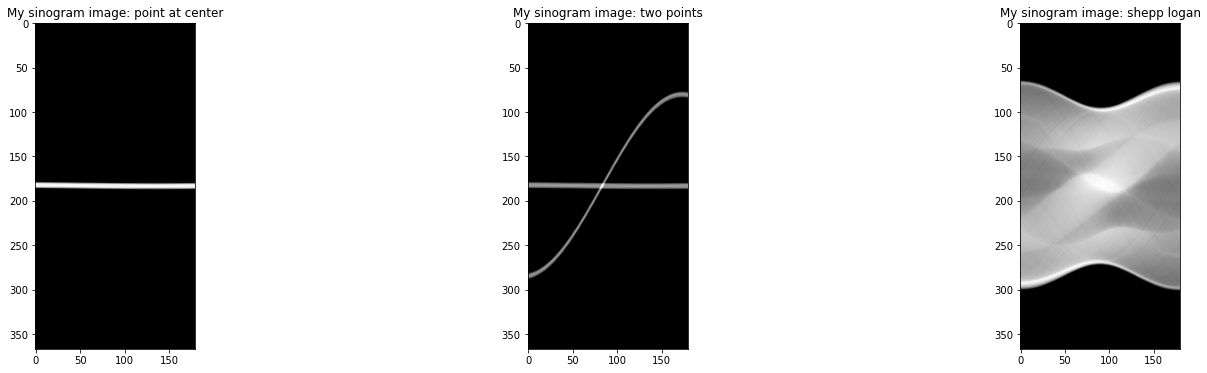

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

phantom_1 = MyPhantom(256, 'point at center')
projection_1 = MyParallelBeamProjections(phantom_1, theta = np.arange(180))

phantom_2 = MyPhantom(256, 'two points')
projection_2 = MyParallelBeamProjections(phantom_2, theta = np.arange(180))

phantom_3 = MyPhantom(256, 'shepp logan')
projection_3 = MyParallelBeamProjections(phantom_3, theta = np.arange(180))

fig, ax = plt.subplots(1,3,figsize=(25,6))

ax[0].imshow(projection_1, cmap=cm.Greys_r)
ax[0].set_title('My sinogram image: point at center')

ax[1].imshow(projection_2, cmap=cm.Greys_r)
ax[1].set_title('My sinogram image: two points')

ax[2].imshow(projection_3, cmap=cm.Greys_r)
ax[2].set_title('My sinogram image: shepp logan')

Text(0.5, 1.0, 'My sinogram image: shepp logan')

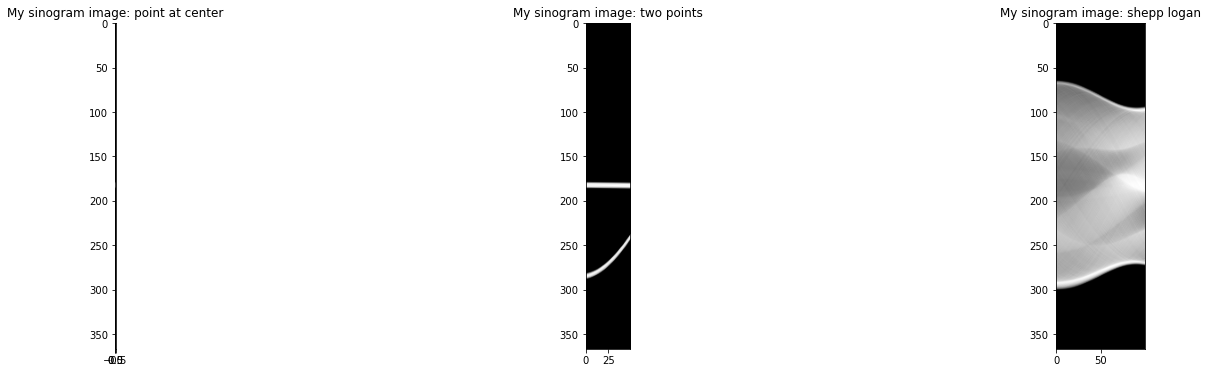

In [38]:
phantom_1 = MyPhantom(256, 'point at center')
projection_1 = MyParallelBeamProjections(phantom_1, theta = np.arange(1))

phantom_2 = MyPhantom(256, 'two points')
projection_2 = MyParallelBeamProjections(phantom_2, theta = np.arange(50))

phantom_3 = MyPhantom(256, 'shepp logan')
projection_3 = MyParallelBeamProjections(phantom_3, theta = np.arange(100))

fig, ax = plt.subplots(1,3,figsize=(25,6))

ax[0].imshow(projection_1, cmap=cm.Greys_r)
ax[0].set_title('My sinogram image: point at center')

ax[1].imshow(projection_2, cmap=cm.Greys_r)
ax[1].set_title('My sinogram image: two points')

ax[2].imshow(projection_3, cmap=cm.Greys_r)
ax[2].set_title('My sinogram image: shepp logan')

1. Acabar de entender el codigo
2. Explicar bien MyPhantom
3. 2.8 comprobar diferentes valores de intensidad en shepp logan
4. Explicar MyRecantagularPhanthom
5. 3.3 Explicar teoria sinogramas
6. 3.4 Explicar funcion beam


In [3]:
from numpy import mgrid
n = 256
ygrid, xgrid = mgrid[-1:1:(1j*n), -1:1:(1j*n)] 
print(ygrid)
print( xgrid)

[[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-0.99215686 -0.99215686 -0.99215686 ... -0.99215686 -0.99215686
  -0.99215686]
 [-0.98431373 -0.98431373 -0.98431373 ... -0.98431373 -0.98431373
  -0.98431373]
 ...
 [ 0.98431373  0.98431373  0.98431373 ...  0.98431373  0.98431373
   0.98431373]
 [ 0.99215686  0.99215686  0.99215686 ...  0.99215686  0.99215686
   0.99215686]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]
[[-1.         -0.99215686 -0.98431373 ...  0.98431373  0.99215686
   1.        ]
 [-1.         -0.99215686 -0.98431373 ...  0.98431373  0.99215686
   1.        ]
 [-1.         -0.99215686 -0.98431373 ...  0.98431373  0.99215686
   1.        ]
 ...
 [-1.         -0.99215686 -0.98431373 ...  0.98431373  0.99215686
   1.        ]
 [-1.         -0.99215686 -0.98431373 ...  0.98431373  0.99215686
   1.        ]
 [-1.         -0.99215686 -0.98431373 ...  0.98431373  0.99215686
   1.        ]]
